# Phase I - Data Collection and Preparation.

In [ ]:
'''A census is an official survey of the population of a country that is carried out in order to find out how many people live 
   there and to obtain other specific details with respect to population.
   
   Census of India is done every 10 years,lastly it was suppose to be connducted in 2021 but it has been delayed to 2022,
   and then further delayed to 2023 due to the COVID-19 pandemic in India. 
   Following the postponement of deadline of freezing administrative boundaries to 30 June 2023, and owing to the 
   general elections in 2024, the census can now only take place in late 2024.
   
   
   Population Of Each State
   Literacy Rate in each state
   Area of each state
   
   Above Data Collected from below two sites.
   https://censusindia.gov.in/census.website/data/population-finder
   https://data.gov.in/catalog/literacy-rate-india-nsso-and-rgi
   https://www.findeasy.in/indian-states-by-literacy-rate/
   
   Data Collected and copied in below mentioned files.
   
   State_Master.xlsx
   District_Master.xlsx
   Population_Literacy_Area.xlsx
   
   Data Already Provided 
   
   01_District_wise_crimes_committed_IPC_2001_2012.xlsx
   02_01_District_wise_crimes_committed_against_SC_2001_2012.xlsx
   42_District_wise_crimes_committed_against_women_2001_2012.xlsx.
   
'''

# Phase 2 - Statewise Analysis.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from matplotlib import colors
import warnings
warnings.filterwarnings("ignore") 

state_master_df = pd.read_csv(r'C:\Users\kp202\State_Master.csv')
print(state_master_df)

    State                       Name
0       1            JAMMU & KASHMIR
1       2           HIMACHAL PRADESH
2       3                     PUNJAB
3       4                 CHANDIGARH
4       5                UTTARAKHAND
5       6                    HARYANA
6       7               NCT OF DELHI
7       8                  RAJASTHAN
8       9              UTTAR PRADESH
9      10                      BIHAR
10     11                     SIKKIM
11     12          ARUNACHAL PRADESH
12     13                   NAGALAND
13     14                    MANIPUR
14     15                    MIZORAM
15     16                    TRIPURA
16     17                  MEGHALAYA
17     18                      ASSAM
18     19                WEST BENGAL
19     20                  JHARKHAND
20     21                     ODISHA
21     22               CHHATTISGARH
22     23             MADHYA PRADESH
23     24                    GUJARAT
24     25                DAMAN & DIU
25     26       DADRA & NAGAR HAVELI
2

2.1	Analysis of Literacy Rate vs Total Crimes.

In [ ]:
"""
Definitions:
Literacy Rate:In India, the effective literacy rate is calculated by dividing the total number of literate persons by the 
              total population and multiplying it by 100.
              
Crime Rate:A crime rate describes the number of crimes reported to law enforcement agencies for every 100,000 persons 
           within a population. A crime rate is calculated by dividing the number of reported crimes by the total population. 
           The result is then multiplied by 100,000.               
"""

In [5]:
litvscrime_df = pd.read_excel(r'C:\Users\kp202\staewise_pop_lit_crime.xlsx')
litvscrime_df.head()

,STATE,TOT_P,P_LIT,P_ILL,TOT_CRIMES,LIT_RT,CRIME_RT,AREA SQ/KM
0,A & N ISLANDS,380581,294281,86300,18204,77.324144,4783.213035,8249
1,ANDHRA PRADESH,84580777,50556760,34024017,4037962,59.773345,4774.089507,162970
2,ARUNACHAL PRADESH,1383727,766005,617722,55304,55.358102,3996.742132,83743
3,ASSAM,31205576,19177977,12027599,1195528,61.456892,3831.135820,78438
4,BIHAR,104099452,52504553,51594899,2692586,50.436916,2586.551560,94163


<Axes: xlabel='CRIME_RT', ylabel='LIT_RT'>

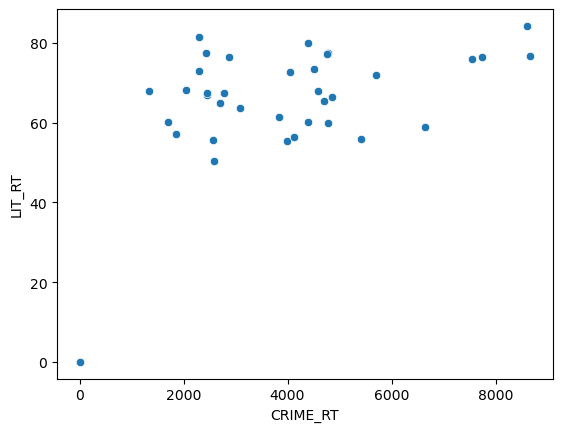

In [6]:
import seaborn as sns
sns.scatterplot(x="CRIME_RT", y="LIT_RT", data=litvscrime_df)

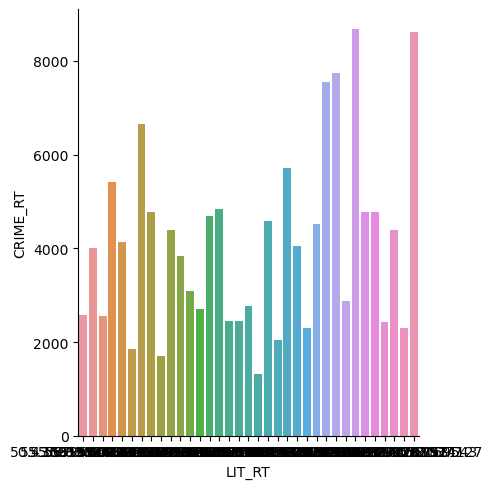

In [18]:
sns.catplot(data=litvscrime_df,x='LIT_RT',y='CRIME_RT',kind='bar')

2.2	 Analysis of the type of crime vs each state vs Literacy rate.

In [7]:
statewise_crime_df = pd.read_excel(r'C:\Users\kp202\state_crime_literacy.xlsx')
null_df = statewise_crime_df.isnull().any()
print(null_df)


STATE                       False
CRIME_RATE                  False
CRI_RT                      False
LIT_RATE                    False
MURDER                      False
ATTEMPT_TO_MURDER           False
CULPABLE_HOMICIDE           False
RAPE                        False
KIDNAPPING                  False
DACOITY                     False
PREPARATION_FOR_DACOITY     False
ROBBERY                     False
BURGLARY                    False
THEFT                       False
RIOTS                       False
CRIMINAL_BREACH_OF_TRUST    False
CHEATING                    False
COUNTERFIETING              False
ARSON                       False
HURT                        False
DOWRY_DEATHS                False
ASSAULT                     False
MODESTY_OF_WOMEN            False
CRUELTY_B_ HUSBAND          False
IMPORTATION_OF_GIRLS        False
DEATH_BY_NEGLIGENCE         False
dtype: bool


In [24]:
statewise_crime_df.head()

,STATE,CRIME_RATE,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE,RAPE,KIDNAPPING,DACOITY,PREPARATION_FOR_DACOITY,ROBBERY,...,CHEATING,COUNTERFIETING,ARSON,HURT,DOWRY_DEATHS,ASSAULT,MODESTY_OF_WOMEN,CRUELTY_B_ HUSBAND,IMPORTATION_OF_GIRLS,DEATH_BY_NEGLIGENCE
0,A & N ISLANDS,4783.213035,320,130,42,218,188,30,0,148,...,506,22,196,2210,12,428,86,242,0,84
1,ANDHRA PRADESH,4774.089507,63512,44840,3526,26958,42478,3974,160,15210,...,197686,6214,23936,1093130,12430,103998,72262,238014,34,276870
2,ARUNACHAL PRADESH,3996.742132,1682,834,72,1000,1714,520,8,1686,...,1040,104,500,10314,4,1568,36,334,0,1490
3,ASSAM,3831.135820,30864,11324,1436,32356,55878,8340,506,14934,...,24782,1796,15836,138366,2552,27240,224,78776,16,60410
4,BIHAR,2586.551560,82490,81838,7344,26248,74440,22198,2530,47332,...,61380,1652,17018,378532,27096,15152,452,51360,880,88884


In [11]:
shp_gdf = gpd.read_file(r"C:\Users\kp202\Indian_States.shp") 
shp_gdf.head()  

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


<Axes: >

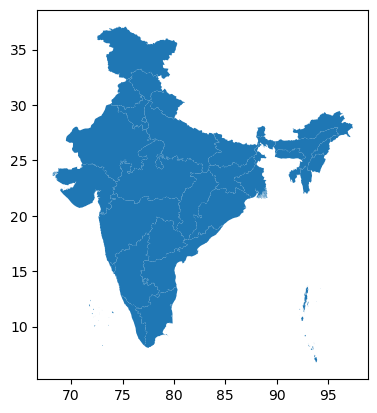

In [55]:
shp_gdf.plot()

In [12]:
merged_df = shp_gdf.set_index('st_nm').join(statewise_crime_df.set_index('STATE'))
merged_df.reset_index(level=0, inplace=True)
merged_df.head()

,st_nm,geometry,CRIME_RATE,CRI_RT,LIT_RATE,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE,RAPE,KIDNAPPING,...,CHEATING,COUNTERFIETING,ARSON,HURT,DOWRY_DEATHS,ASSAULT,MODESTY_OF_WOMEN,CRUELTY_B_ HUSBAND,IMPORTATION_OF_GIRLS,DEATH_BY_NEGLIGENCE
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",4783.213035,47.832130,86.27,320.0,130.0,42.0,218.0,188.0,...,506.0,22.0,196.0,2210.0,12.0,428.0,86.0,242.0,0.0,84.0
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",3996.742132,39.967421,66.95,1682.0,834.0,72.0,1000.0,1714.0,...,1040.0,104.0,500.0,10314.0,4.0,1568.0,36.0,334.0,0.0,1490.0
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",3831.135820,38.311358,85.90,30864.0,11324.0,1436.0,32356.0,55878.0,...,24782.0,1796.0,15836.0,138366.0,2552.0,27240.0,224.0,78776.0,16.0,60410.0
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",2586.551560,25.865516,70.90,82490.0,81838.0,7344.0,26248.0,74440.0,...,61380.0,1652.0,17018.0,378532.0,27096.0,15152.0,452.0,51360.0,880.0,88884.0
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",7732.625894,77.326259,86.43,486.0,602.0,158.0,562.0,1280.0,...,4602.0,54.0,124.0,1632.0,84.0,628.0,286.0,1614.0,0.0,196.0


In [57]:
merged_df.fillna(0, inplace=True)
merged_df.head()
list((merged_df.columns))

['st_nm',
 'geometry',
 'CRIME_RATE',
 'MURDER',
 'ATTEMPT_TO_MURDER',
 'CULPABLE_HOMICIDE',
 'RAPE',
 'KIDNAPPING',
 'DACOITY',
 'PREPARATION_FOR_DACOITY',
 'ROBBERY',
 'BURGLARY',
 'THEFT',
 'RIOTS',
 'CRIMINAL_BREACH_OF_TRUST',
 'CHEATING',
 'COUNTERFIETING',
 'ARSON',
 'HURT',
 'DOWRY_DEATHS',
 'ASSAULT',
 'MODESTY_OF_WOMEN',
 'CRUELTY_B_ HUSBAND',
 'IMPORTATION_OF_GIRLS',
 'DEATH_BY_NEGLIGENCE']

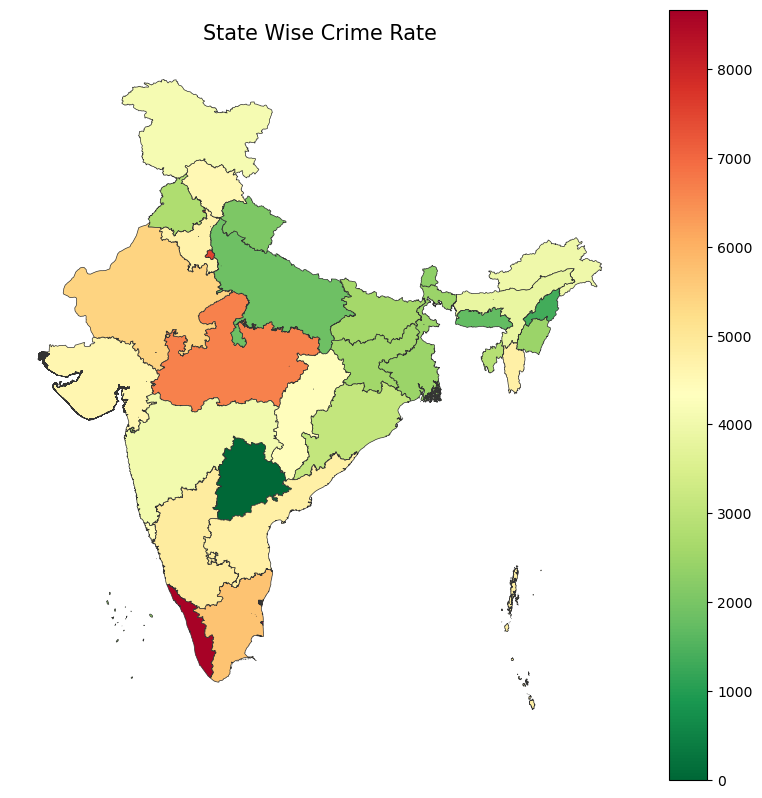

In [58]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State Wise Crime Rate',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged_df.plot(column='CRIME_RATE', cmap='RdYlGn_r', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State Wise Crime Rate',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged_df.plot(column='CRIME_RATE', cmap='RdYlGn_r', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [13]:
statewise_crime_df = pd.read_excel(r'C:\Users\kp202\state_crime_literacy.xlsx')
statewise_crime_df.head()

,STATE,CRIME_RATE,CRI_RT,LIT_RATE,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE,RAPE,KIDNAPPING,DACOITY,...,CHEATING,COUNTERFIETING,ARSON,HURT,DOWRY_DEATHS,ASSAULT,MODESTY_OF_WOMEN,CRUELTY_B_ HUSBAND,IMPORTATION_OF_GIRLS,DEATH_BY_NEGLIGENCE
0,Andaman & Nicobar Island,4783.213035,47.832130,86.27,320,130,42,218,188,30,...,506,22,196,2210,12,428,86,242,0,84
1,Andhra Pradesh,4774.089507,47.740895,66.40,63512,44840,3526,26958,42478,3974,...,197686,6214,23936,1093130,12430,103998,72262,238014,34,276870
2,Arunanchal Pradesh,3996.742132,39.967421,66.95,1682,834,72,1000,1714,520,...,1040,104,500,10314,4,1568,36,334,0,1490
3,Assam,3831.135820,38.311358,85.90,30864,11324,1436,32356,55878,8340,...,24782,1796,15836,138366,2552,27240,224,78776,16,60410
4,Bihar,2586.551560,25.865516,70.90,82490,81838,7344,26248,74440,22198,...,61380,1652,17018,378532,27096,15152,452,51360,880,88884


<Axes: xlabel='STATE'>

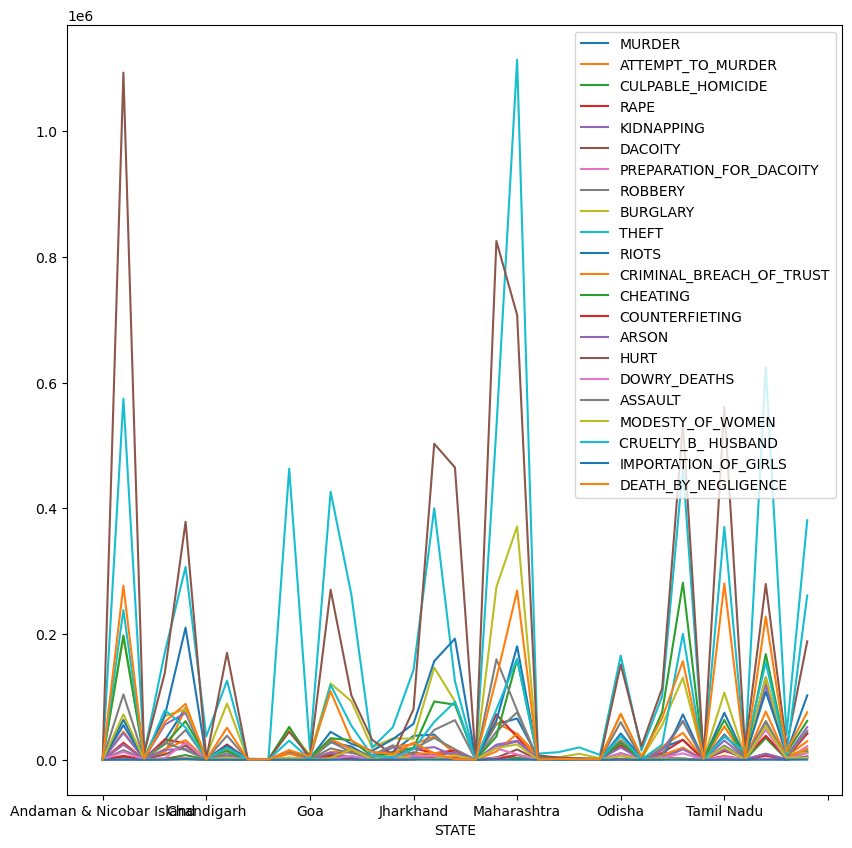

In [14]:
statewise_crime_df.plot(x="STATE", y=["MURDER","ATTEMPT_TO_MURDER","CULPABLE_HOMICIDE","RAPE","KIDNAPPING","DACOITY",
                                      "PREPARATION_FOR_DACOITY","ROBBERY","BURGLARY","THEFT","RIOTS",
                                      "CRIMINAL_BREACH_OF_TRUST","CHEATING","COUNTERFIETING","ARSON","HURT",
                                      "DOWRY_DEATHS","ASSAULT","MODESTY_OF_WOMEN","CRUELTY_B_ HUSBAND",
                                      "IMPORTATION_OF_GIRLS","DEATH_BY_NEGLIGENCE"],
        kind="line", figsize=(10, 10))

2.3	Analysis of year-on-year total crime rate.

In [4]:
yearwise_crime_df = pd.read_csv(r'C:\Users\kp202\yr_wise_crime.csv')
yearwise_crime_df.head()

,YEAR,CRIME_CNT
0,2001,3538616
1,2002,3560660
2,2003,3432240
3,2004,3664020
4,2005,3645204


In [5]:
print(yearwise_crime_df.size)
print(yearwise_crime_df.dtypes)
print(yearwise_crime_df.isnull().values.any())

24
YEAR         int64
CRIME_CNT    int64
dtype: object
False


Text(0, 0.5, 'Total Crimes in Lakhs')

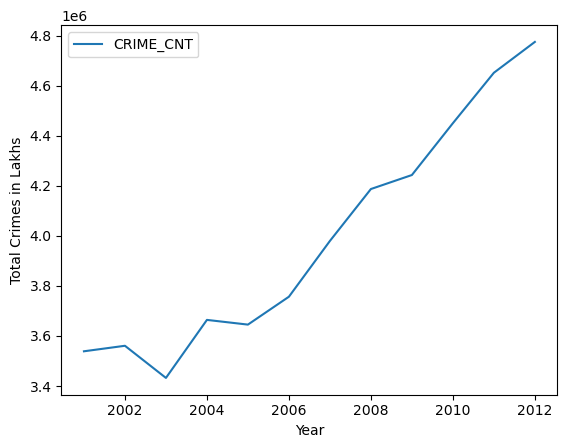

In [8]:
ax = yearwise_crime_df.plot.line(x='YEAR',y='CRIME_CNT')
ax.set_xlabel("Year")
ax.set_ylabel("Total Crimes in Lakhs")

2.4	 Analysis of area vs overall crime

In [16]:
st_crime_area_df = pd.read_csv(r'C:\Users\kp202\staewise_pop_lit_crime.csv')
st_crime_area_df.head()

,STATE,TOT_P,P_LIT,P_ILL,TOT_CRIMES,LIT_RT,CRIME_RT,AREA_SQ_KM
0,A & N ISLANDS,380581.0,294281.0,86300.0,18204.0,77.32,4783.21,8249.0
1,ANDHRA PRADESH,84580777.0,50556760.0,34024017.0,4037962.0,59.77,4774.09,162970.0
2,ARUNACHAL PRADESH,1383727.0,766005.0,617722.0,55304.0,55.36,3996.74,83743.0
3,ASSAM,31205576.0,19177977.0,12027599.0,1195528.0,61.46,3831.14,78438.0
4,BIHAR,104099452.0,52504553.0,51594899.0,2692586.0,50.44,2586.55,94163.0


In [20]:
st_crime_area_df =st_crime_area_df.drop(37)


In [23]:
print(st_crime_area_df.size)
print(st_crime_area_df.isnull().values.any())

296
False


<Axes: title={'center': 'Stacked Bar Graph by dataframe'}, xlabel='STATE'>

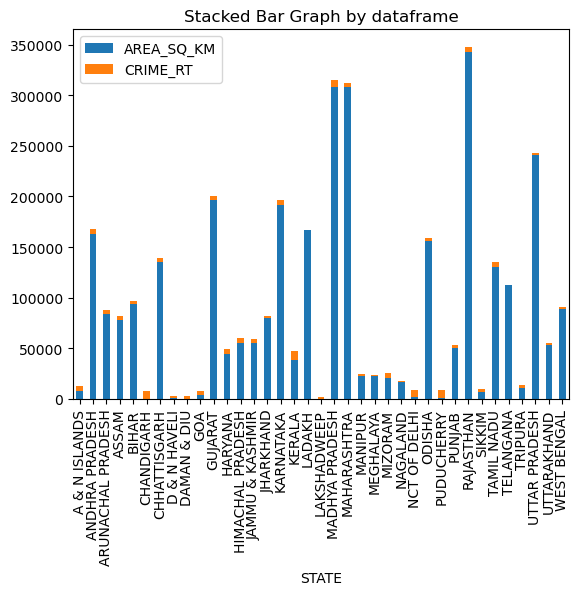

In [48]:
import matplotlib.pyplot as plt

st_crime_area_df.plot(x='STATE', kind='bar', y=['AREA_SQ_KM','CRIME_RT'],stacked=True,
        title='Stacked Bar Graph by dataframe')



2.5	 Analysis of Population vs overall Crime

<Axes: title={'center': 'Stacked Bar Graph by dataframe'}, xlabel='STATE'>

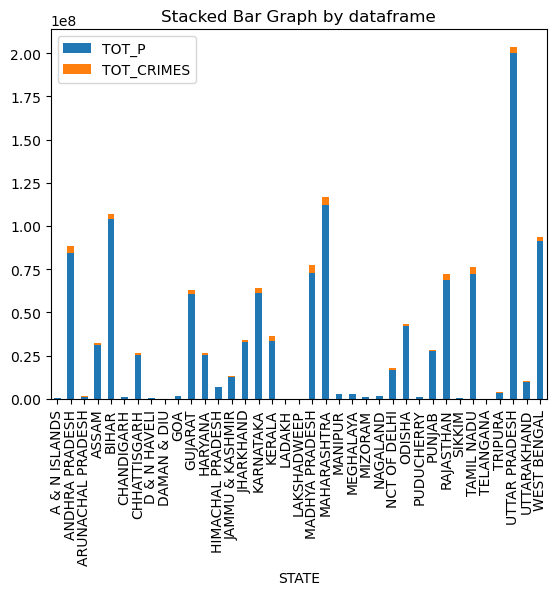

In [51]:
st_crime_area_df.plot(x='STATE', kind='bar', y=['TOT_P','TOT_CRIMES'],stacked=True,
        title='Stacked Bar Graph by dataframe')

2.6	Each state crime report. There is no fixed format to write a report, you can write a report inside the notebook itself based on what you have analyzed in the above points.

In [ ]:
1. Top 5 states having maximun number of crimes are - MADHYA PRADESH,MAHARASHTRA,TAMIL NADU,ANDHRA PRADESH,UTTAR PRADESH.
2. Top 5 states having maximun number of crime rate are - PUDUCHERRY,KERALA,CHANDIGARH,NCT OF DELHI,MADHYA PRADESH
3. Crime Rate is independant of Literacy Rate and Total Size (Area)
4. Year by Year crime rate is increasing exponentialy.
5. Crime Rate in Urban Area is more as compared to Rural Area.

# Phase 3 - SQL Operations.

In [ ]:
'''
Above Collected Data has been loaded in MYSQL database.
'''

In [1]:
!pip install PyMySQL

     ---------------------------------------- 44.8/44.8 kB 1.1 MB/s eta 0:00:00


In [2]:
! pip install ipython-sql

     ---------------------------------------- 41.2/41.2 kB ? eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 1.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.39
    Uninstalling SQLAlchemy-1.4.39:
      Successfully uninstalled SQLAlchemy-1.4.39


In [3]:
! pip install mysqlclient

     -------------------------------------- 203.2/203.2 kB 2.1 MB/s eta 0:00:00


In [1]:
import pymysql as pysql
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 

db_name = "kirandb"
db_host = "localhost"
db_username = "root"
db_password = "root"

try:
    conn = pysql.connect(host = db_host,
                         port = int(3306),
                         user = "root",
                         password = db_password,
                         db = db_name)
except e:
    print (e)
if conn:
    print ("connection successful")
else:
        print ("error")

connection successful


3.1 - Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

Data inserted in MYSQL databse using "Table Data Import Wizard"
All "TOTAL" and "DELHI UT TOTAL" columns deleted from the table.

3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [10]:
l_qry1 ="""select 'Rape' CRIME, year YEAR,state STATE ,district DISTRICT,rape CRIME_COUNT 
            from crime_against_women A
           where a.rape = (select max(rape)
                             from crime_against_women B)
          union
          select 'Kidnappings' CRIME,year YEAR ,state STATE,district DISTRICT,kid_abd CRIME_COUNT 
            from crime_against_women A
           where a.kid_abd = (select max(kid_abd)
                                from crime_against_women B) """

df = pd.read_sql_query(l_qry1, conn)
print(df.to_string(index=False))

      CRIME  YEAR       STATE    DISTRICT  CRIME_COUNT
       Rape  2009 WEST BENGAL MURSHIDABAD          568
Kidnappings  2011 WEST BENGAL MURSHIDABAD          492


3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [11]:
l_qry2 = """ select 'Rape' CRIME, year YR ,state STATE ,district DISTRICT ,rape CRIME_COUNT
              from crime_against_women A
             where a.rape = (select min(rape)
                              from crime_against_women B)
            union
           select 'Kidnapping' CRIME, year YR ,state STATE ,district DISTRICT ,kid_abd CRIME_COUNT
             from crime_against_women A
            where a.kid_abd = (select min(kid_abd)
                                 from crime_against_women B)"""
df = pd.read_sql_query(l_qry2, conn)
print(df.to_string(index=False))

     CRIME   YR             STATE            DISTRICT  CRIME_COUNT
      Rape 2001    ANDHRA PRADESH       GUNTAKAL RLY.            0
      Rape 2001    ANDHRA PRADESH   SECUNDERABAD RLY.            0
      Rape 2001 ARUNACHAL PRADESH         KAMENG WEST            0
      Rape 2001             ASSAM              C.I.D.            0
      Rape 2001             BIHAR               ARWAL            0
      Rape 2001             BIHAR        KATIHAR RLY.            0
      Rape 2001      CHHATTISGARH          GRP RAIPUR            0
      Rape 2001           HARYANA                 GRP            0
      Rape 2001  HIMACHAL PRADESH              G.R.P.            0
      Rape 2001   JAMMU & KASHMIR         CRIME JAMMU            0
      Rape 2001   JAMMU & KASHMIR      CRIME SRINAGAR            0
      Rape 2001   JAMMU & KASHMIR              KARGIL            0
      Rape 2001   JAMMU & KASHMIR                 LEH            0
      Rape 2001   JAMMU & KASHMIR            RAILWAYS         

3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

Data inserted in MYSQL databse using "Table Data Import Wizard"
All "TOTAL" and "DELHI UT TOTAL" columns deleted from the table.

3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

In [12]:
l_qry3 ="""select 'DACOITY' CRIME, district DISTRICT ,year YR,dacoity CRIME_COUNT 
             from crimes_committed_against_st a
            where a.dacoity = (select max(dacoity)
                                 from crimes_committed_against_st)
            union
            select 'ROBBERY' CRIME, district DISTRICT ,year YR,robbery CRIME_COUNT  
            from crimes_committed_against_st a
           where a.robbery = (select max(robbery)
                                from crimes_committed_against_st) """

df = pd.read_sql_query(l_qry3, conn)
print(df.to_string(index=False))

  CRIME DISTRICT   YR  CRIME_COUNT
DACOITY    DAHOD 2004           29
ROBBERY    DAHOD 2001           32


3.6	Write SQL query to find in which districts(All) the lowest number of murders happened

In [14]:
l_qry4 = """ select DISTINCT year YR,district DISTRICT ,murder MURDER_COUNT 
               from crimes_committed_against_st a
              where a.Murder = (select min(Murder)
                                  from crimes_committed_against_st) """
df = pd.read_sql_query(l_qry4, conn)
print(df.to_string(index=False))

  YR            DISTRICT  MURDER_COUNT
2001            ADILABAD             0
2001           ANANTAPUR             0
2001            CHITTOOR             0
2001            CUDDAPAH             0
2001       EAST GODAVARI             0
2001       GUNTAKAL RLY.             0
2001              GUNTUR             0
2001      HYDERABAD CITY             0
2001          KARIMNAGAR             0
2001             KRISHNA             0
2001             KURNOOL             0
2001               MEDAK             0
2001           NIZAMABAD             0
2001           PRAKASHAM             0
2001         RANGA REDDY             0
2001   SECUNDERABAD RLY.             0
2001          SRIKAKULAM             0
2001          VIJAYAWADA             0
2001     VIJAYAWADA RLY.             0
2001       VISAKHA RURAL             0
2001       VISAKHAPATNAM             0
2001        VIZIANAGARAM             0
2001            WARANGAL             0
2001       WEST GODAVARI             0
2001           CHANGLANG 

3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.

In [16]:
l_qry5 = """ select year,district,murder
               from crimes_committed_against_st
              where murder > 0 
              order by year,district """

df = pd.read_sql_query(l_qry5, conn)
print(df.to_string(index=False))

 year            district  murder
 2001          AHMEDNAGAR       1
 2001             ALIGARH       2
 2001              ARARIA       1
 2001            BALAGHAT       1
 2001               BARAN       1
 2001             BARWANI       2
 2001              BHOPAL       1
 2001            BILASPUR       3
 2001            BOLANGIR       2
 2001              CHATRA       1
 2001          CHHINDWARA       2
 2001               DAUSA       2
 2001                DHAR       3
 2001             DHOLPUR       1
 2001               DHULE       2
 2001                EAST       4
 2001            GAJAPATI       1
 2001                GUNA       2
 2001             GWALIOR       1
 2001         HOSHANGABAD       1
 2001            JABALPUR       2
 2001           JAGDALPUR       1
 2001              JAIPUR       2
 2001             JANJGIR       3
 2001            JHALAWAR       1
 2001           JHUNJHUNU       1
 2001              KANKER       6
 2001              KANNUR       1
 2001         

3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

Data inserted in MYSQL databse using "Table Data Import Wizard"
All "TOTAL" and "DELHI UT TOTAL" columns deleted from the table.

3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [17]:
l_qry6 = """select year YR,state ST,district DIST,murder MURDER_COUNT
              from crimes_committed_ipc A
             where (a.year,a.murder) in (select year,max(murder) 
                                           from crimes_committed_ipc B
                                          group by year ) """

df = pd.read_sql_query(l_qry6, conn)
print(df.to_string(index=False))

  YR    ST  DIST  MURDER_COUNT
2001 BIHAR PATNA           434
2002 BIHAR PATNA           472
2003 BIHAR PATNA           484
2004 BIHAR PATNA           542
2005 BIHAR PATNA           436
2006 BIHAR PATNA           338
2007 BIHAR PATNA           317
2008 BIHAR PATNA           341
2009 BIHAR PATNA           314
2010 BIHAR PATNA           304
2011 BIHAR PATNA           248
2012 BIHAR PATNA           356


3.8.3	Store the above data (the result of 3.8.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [34]:
murder_details_df = df
murder_details_df.groupby('DIST')['DIST'].count()


DIST
PATNA    12
Name: DIST, dtype: int64

3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)

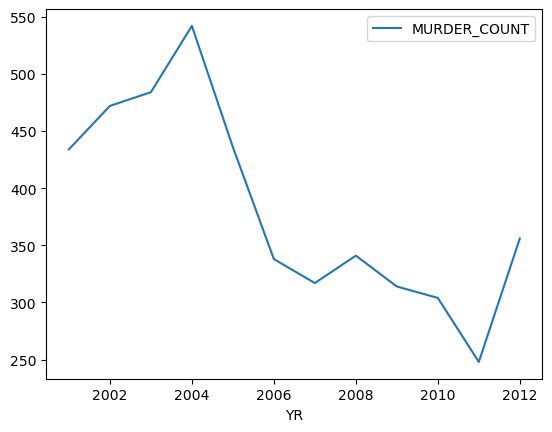

In [37]:
import matplotlib.pyplot as plt

murder_details_df.plot(x="YR", y= "MURDER_COUNT")
plt.show()

# Unsupervised ML (Clustering)

4.1  "Create 3 clusters as below.

1. Sensitive Area's,
2. Moderate Area's
3. Peaceful Area's"

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from matplotlib import colors
import warnings
warnings.filterwarnings("ignore") 

In [70]:
df=pd.read_csv(r'C:\Users\kp202\01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [71]:
null_df = df.isnull().any()
print(null_df)

STATE                                       True
DISTRICT                                    True
YEAR                                        True
MURDER                                     False
ATTEMPT_TO_MURDER                           True
CULPABLE_HOMICIDE_NOT_MURDER                True
RAPE                                        True
CUSTODIAL_RAPE                              True
OTHER_RAPE                                  True
KIDNAPPING_ABDUCTION                        True
KIDNAPPING_ABDUCTION_OF_WOMEN_AND_GIRLS     True
KIDNAPPING_ABDUCTION_OTHERS                 True
DACOITY                                     True
PREP_ASSEM_FOR_DACOITY                      True
ROBBERY                                     True
BURGLARY                                    True
THEFT                                       True
AUTO_THEFT                                  True
OTHER_THEFT                                 True
RIOTS                                       True
CRIMINAL_BREACH_OF_T

In [72]:
df.tail()

,STATE,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING_ABDUCTION,...,ARSON,HURT_GREVIOUS_HURT,DOWRY_DEATHS,WOMEN_OUTRAGE_MODESTY,INSULT_MODESTY_O_ WOMEN,CRUELTY_HUSBAND_RELATIVES,IMPORTATION_GIRLS_FOREIGN_COUNTRIES,DEATH_BY_NEGLIGENCE,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES
9014,PUDUCHERRY,KARAIKAL,2012.0,5,6.0,2.0,6.0,0.0,6.0,2.0,...,1.0,186.0,0.0,2.0,0.0,1.0,0.0,44.0,392.0,787.0
9015,PUDUCHERRY,PUDUCHERRY,2012.0,24,21.0,10.0,7.0,0.0,7.0,17.0,...,20.0,632.0,0.0,7.0,2.0,5.0,0.0,219.0,1668.0,3494.0
9016,PUDUCHERRY,TOTAL,2012.0,29,27.0,12.0,13.0,0.0,13.0,19.0,...,21.0,818.0,0.0,9.0,2.0,6.0,0.0,263.0,2060.0,4281.0
9017,NaN,NaN,NaN,1094,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9018,NaN,NaN,NaN,547,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df=df.drop(9017)
df=df.drop(9018)

In [74]:
print(df.size)
print(df.dtypes)
print(df.isnull().values.any())
print(df.shape)

297561
STATE                                       object
DISTRICT                                    object
YEAR                                       float64
MURDER                                       int64
ATTEMPT_TO_MURDER                          float64
CULPABLE_HOMICIDE_NOT_MURDER               float64
RAPE                                       float64
CUSTODIAL_RAPE                             float64
OTHER_RAPE                                 float64
KIDNAPPING_ABDUCTION                       float64
KIDNAPPING_ABDUCTION_OF_WOMEN_AND_GIRLS    float64
KIDNAPPING_ABDUCTION_OTHERS                float64
DACOITY                                    float64
PREP_ASSEM_FOR_DACOITY                     float64
ROBBERY                                    float64
BURGLARY                                   float64
THEFT                                      float64
AUTO_THEFT                                 float64
OTHER_THEFT                                float64
RIOTS                   

In [75]:
df.drop('STATE',
  axis='columns', inplace=True)

In [76]:
print(df.shape)

(9017, 32)


In [77]:
df.head()

,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING_ABDUCTION,KIDNAPPING_ABDUCTION_OF_WOMEN_AND_GIRLS,...,ARSON,HURT_GREVIOUS_HURT,DOWRY_DEATHS,WOMEN_OUTRAGE_MODESTY,INSULT_MODESTY_O_ WOMEN,CRUELTY_HUSBAND_RELATIVES,IMPORTATION_GIRLS_FOREIGN_COUNTRIES,DEATH_BY_NEGLIGENCE,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES
0,ADILABAD,2001.0,101,60.0,17.0,50.0,0.0,50.0,46.0,30.0,...,30.0,1131.0,16.0,149.0,34.0,175.0,0.0,181.0,1518.0,4154.0
1,ANANTAPUR,2001.0,151,125.0,1.0,23.0,0.0,23.0,53.0,30.0,...,69.0,1543.0,7.0,118.0,24.0,154.0,0.0,270.0,754.0,4125.0
2,CHITTOOR,2001.0,101,57.0,2.0,27.0,0.0,27.0,59.0,34.0,...,38.0,2088.0,14.0,112.0,83.0,186.0,0.0,404.0,1262.0,5818.0
3,CUDDAPAH,2001.0,80,53.0,1.0,20.0,0.0,20.0,25.0,20.0,...,23.0,795.0,17.0,126.0,38.0,57.0,0.0,233.0,1181.0,3140.0
4,EAST GODAVARI,2001.0,82,67.0,1.0,23.0,0.0,23.0,49.0,26.0,...,41.0,1244.0,12.0,109.0,58.0,247.0,0.0,431.0,2313.0,6507.0


In [78]:
rslt_df = df.loc[df['DISTRICT'] == 'TOTAL']

In [79]:
print(rslt_df)

     DISTRICT    YEAR  MURDER  ATTEMPT_TO_MURDER  \
28      TOTAL  2001.0    2602             1555.0   
42      TOTAL  2001.0      83               53.0   
70      TOTAL  2001.0    1356              481.0   
115     TOTAL  2001.0    3643             3419.0   
135     TOTAL  2001.0     880              529.0   
...       ...     ...     ...                ...   
8988    TOTAL  2012.0      21               44.0   
8990    TOTAL  2012.0       7                2.0   
8993    TOTAL  2012.0       3                5.0   
9013    TOTAL  2012.0       0                0.0   
9016    TOTAL  2012.0      29               27.0   

      CULPABLE_HOMICIDE_NOT_MURDER   RAPE  CUSTODIAL_RAPE  OTHER_RAPE  \
28                           136.0  871.0             0.0       871.0   
42                             3.0   33.0             0.0        33.0   
70                            40.0  817.0             0.0       817.0   
115                          250.0  888.0             0.0       888.0   
135       

In [42]:
df_new = df.loc[df['DISTRICT'] == 'TOTAL']

In [47]:
print(df.shape)

(9017, 32)


In [80]:
print(df_new.shape)

(408, 32)


In [81]:
"""
Drop rows with district name = TOTAL
"""
temp_df = df.drop(df.loc[df['DISTRICT'] == 'TOTAL'].index) 

In [82]:
print(temp_df.shape) 

(8609, 32)


In [62]:
df=temp_df
df.head()

,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING_ABDUCTION,KIDNAPPING_ABDUCTION_OF_WOMEN_AND_GIRLS,...,ARSON,HURT_GREVIOUS_HURT,DOWRY_DEATHS,WOMEN_OUTRAGE_MODESTY,INSULT_MODESTY_O_ WOMEN,CRUELTY_HUSBAND_RELATIVES,IMPORTATION_GIRLS_FOREIGN_COUNTRIES,DEATH_BY_NEGLIGENCE,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES
0,ADILABAD,2001.0,101,60.0,17.0,50.0,0.0,50.0,46.0,30.0,...,30.0,1131.0,16.0,149.0,34.0,175.0,0.0,181.0,1518.0,4154.0
1,ANANTAPUR,2001.0,151,125.0,1.0,23.0,0.0,23.0,53.0,30.0,...,69.0,1543.0,7.0,118.0,24.0,154.0,0.0,270.0,754.0,4125.0
2,CHITTOOR,2001.0,101,57.0,2.0,27.0,0.0,27.0,59.0,34.0,...,38.0,2088.0,14.0,112.0,83.0,186.0,0.0,404.0,1262.0,5818.0
3,CUDDAPAH,2001.0,80,53.0,1.0,20.0,0.0,20.0,25.0,20.0,...,23.0,795.0,17.0,126.0,38.0,57.0,0.0,233.0,1181.0,3140.0
4,EAST GODAVARI,2001.0,82,67.0,1.0,23.0,0.0,23.0,49.0,26.0,...,41.0,1244.0,12.0,109.0,58.0,247.0,0.0,431.0,2313.0,6507.0


In [83]:
print(df)

           DISTRICT    YEAR  MURDER  ATTEMPT_TO_MURDER  \
0          ADILABAD  2001.0     101               60.0   
1         ANANTAPUR  2001.0     151              125.0   
2          CHITTOOR  2001.0     101               57.0   
3          CUDDAPAH  2001.0      80               53.0   
4     EAST GODAVARI  2001.0      82               67.0   
...             ...     ...     ...                ...   
9012    LAKSHADWEEP  2012.0       0                0.0   
9013          TOTAL  2012.0       0                0.0   
9014       KARAIKAL  2012.0       5                6.0   
9015     PUDUCHERRY  2012.0      24               21.0   
9016          TOTAL  2012.0      29               27.0   

      CULPABLE_HOMICIDE_NOT_MURDER  RAPE  CUSTODIAL_RAPE  OTHER_RAPE  \
0                             17.0  50.0             0.0        50.0   
1                              1.0  23.0             0.0        23.0   
2                              2.0  27.0             0.0        27.0   
3              

In [84]:
df.drop('DISTRICT',
  axis='columns', inplace=True)

In [85]:
df.drop('YEAR',
  axis='columns', inplace=True)

In [86]:
print(df)

      MURDER  ATTEMPT_TO_MURDER  CULPABLE_HOMICIDE_NOT_MURDER  RAPE  \
0        101               60.0                          17.0  50.0   
1        151              125.0                           1.0  23.0   
2        101               57.0                           2.0  27.0   
3         80               53.0                           1.0  20.0   
4         82               67.0                           1.0  23.0   
...      ...                ...                           ...   ...   
9012       0                0.0                           0.0   0.0   
9013       0                0.0                           0.0   0.0   
9014       5                6.0                           2.0   6.0   
9015      24               21.0                          10.0   7.0   
9016      29               27.0                          12.0  13.0   

      CUSTODIAL_RAPE  OTHER_RAPE  KIDNAPPING_ABDUCTION  \
0                0.0        50.0                  46.0   
1                0.0        23.

In [91]:
from sklearn import preprocessing
df_std = preprocessing.scale(df)
print(df_std)
df_std = pd.DataFrame(df_std)

[[ 0.0357965  -0.05955144  0.11936602 ... -0.04403726 -0.08216072
  -0.06241392]
 [ 0.18858167  0.15466657 -0.14945861 ...  0.05105322 -0.17780424
  -0.06397951]
 [ 0.0357965  -0.06943843 -0.13265707 ...  0.19422317 -0.11420881
   0.02741862]
 ...
 [-0.25755104 -0.23751718 -0.13265707 ... -0.1904125  -0.22312224
  -0.24418446]
 [-0.19949267 -0.18808225  0.00175525 ... -0.00343683 -0.06338254
  -0.09804462]
 [-0.18421415 -0.16830828  0.03535832 ...  0.0435742  -0.0143089
  -0.05555771]]


In [92]:
print(df_std)

            0         1         2         3         4         5         6   \
0     0.035796 -0.059551  0.119366 -0.015946 -0.050052 -0.015917 -0.104379   
1     0.188582  0.154667 -0.149459 -0.157507 -0.050052 -0.157490 -0.082339   
2     0.035796 -0.069438 -0.132657 -0.136535 -0.050052 -0.136516 -0.063448   
3    -0.028373 -0.082621 -0.149459 -0.173236 -0.050052 -0.173220 -0.170497   
4    -0.022262 -0.036482 -0.149459 -0.157507 -0.050052 -0.157490 -0.094933   
...        ...       ...       ...       ...       ...       ...       ...   
9012 -0.272830 -0.257291 -0.166260 -0.278095 -0.050052 -0.278088 -0.249209   
9013 -0.272830 -0.257291 -0.166260 -0.278095 -0.050052 -0.278088 -0.249209   
9014 -0.257551 -0.237517 -0.132657 -0.246637 -0.050052 -0.246628 -0.242912   
9015 -0.199493 -0.188082  0.001755 -0.241394 -0.050052 -0.241384 -0.195685   
9016 -0.184214 -0.168308  0.035358 -0.209936 -0.050052 -0.209924 -0.189388   

            7         8         9   ...        20        21    

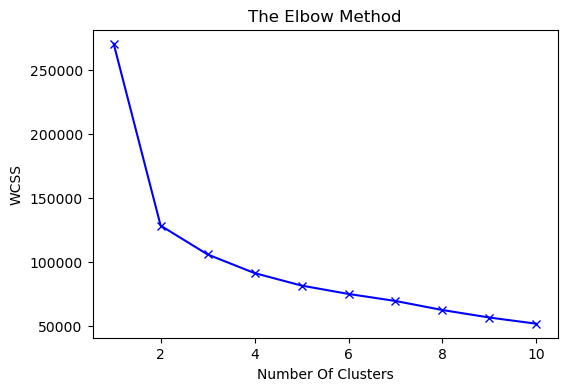

In [111]:
"""
Finding Number of Clusters
"""
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,4))
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++',random_state = 42 )
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [129]:
"""
Fiting Kmeans to dataset
"""
kmeans = KMeans(n_clusters=4, init= 'k-means++',random_state = 42 )
y_kmeans = kmeans.fit_predict(df_std)
y_kmeans

array([1, 1, 1, ..., 1, 1, 1])

In [130]:
y_kmeans=y_kmeans+1
cluster=list(y_kmeans)
df['cluster'] = cluster
kmeans_mean_cluster=pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING_ABDUCTION,KIDNAPPING_ABDUCTION_OF_WOMEN_AND_GIRLS,KIDNAPPING_ABDUCTION_OTHERS,DACOITY,...,ARSON,HURT_GREVIOUS_HURT,DOWRY_DEATHS,WOMEN_OUTRAGE_MODESTY,INSULT_MODESTY_O_ WOMEN,CRUELTY_HUSBAND_RELATIVES,IMPORTATION_GIRLS_FOREIGN_COUNTRIES,DEATH_BY_NEGLIGENCE,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES
cluster,,,,,,,,,,,,,,,,,,,,,
1,1077.6,815.8,93.5,711.6,0.1,711.5,982.4,715.1,267.3,203.8,...,292.5,9068.1,179.5,1266.9,203.5,2357.5,2.5,2185.9,33014.5,72394.3
2,48.3,42.6,5.3,28.7,0.0,28.7,43.0,32.0,11.0,7.0,...,13.9,391.9,10.6,54.3,14.9,101.8,0.1,118.2,1154.9,2817.9
3,2195.5,2014.6,153.3,1669.8,0.1,1669.7,1834.4,1428.4,405.9,241.7,...,895.4,29622.4,472.4,3758.2,1061.9,7376.0,2.0,8650.4,65836.0,173166.3
4,4445.3,4226.6,872.4,1340.9,0.2,1340.8,4020.2,2790.8,1229.5,662.8,...,544.3,13709.0,1557.2,1553.1,1114.0,4304.0,18.5,6594.3,48564.2,133515.3


Text(0.5, 0, 'Cluster')

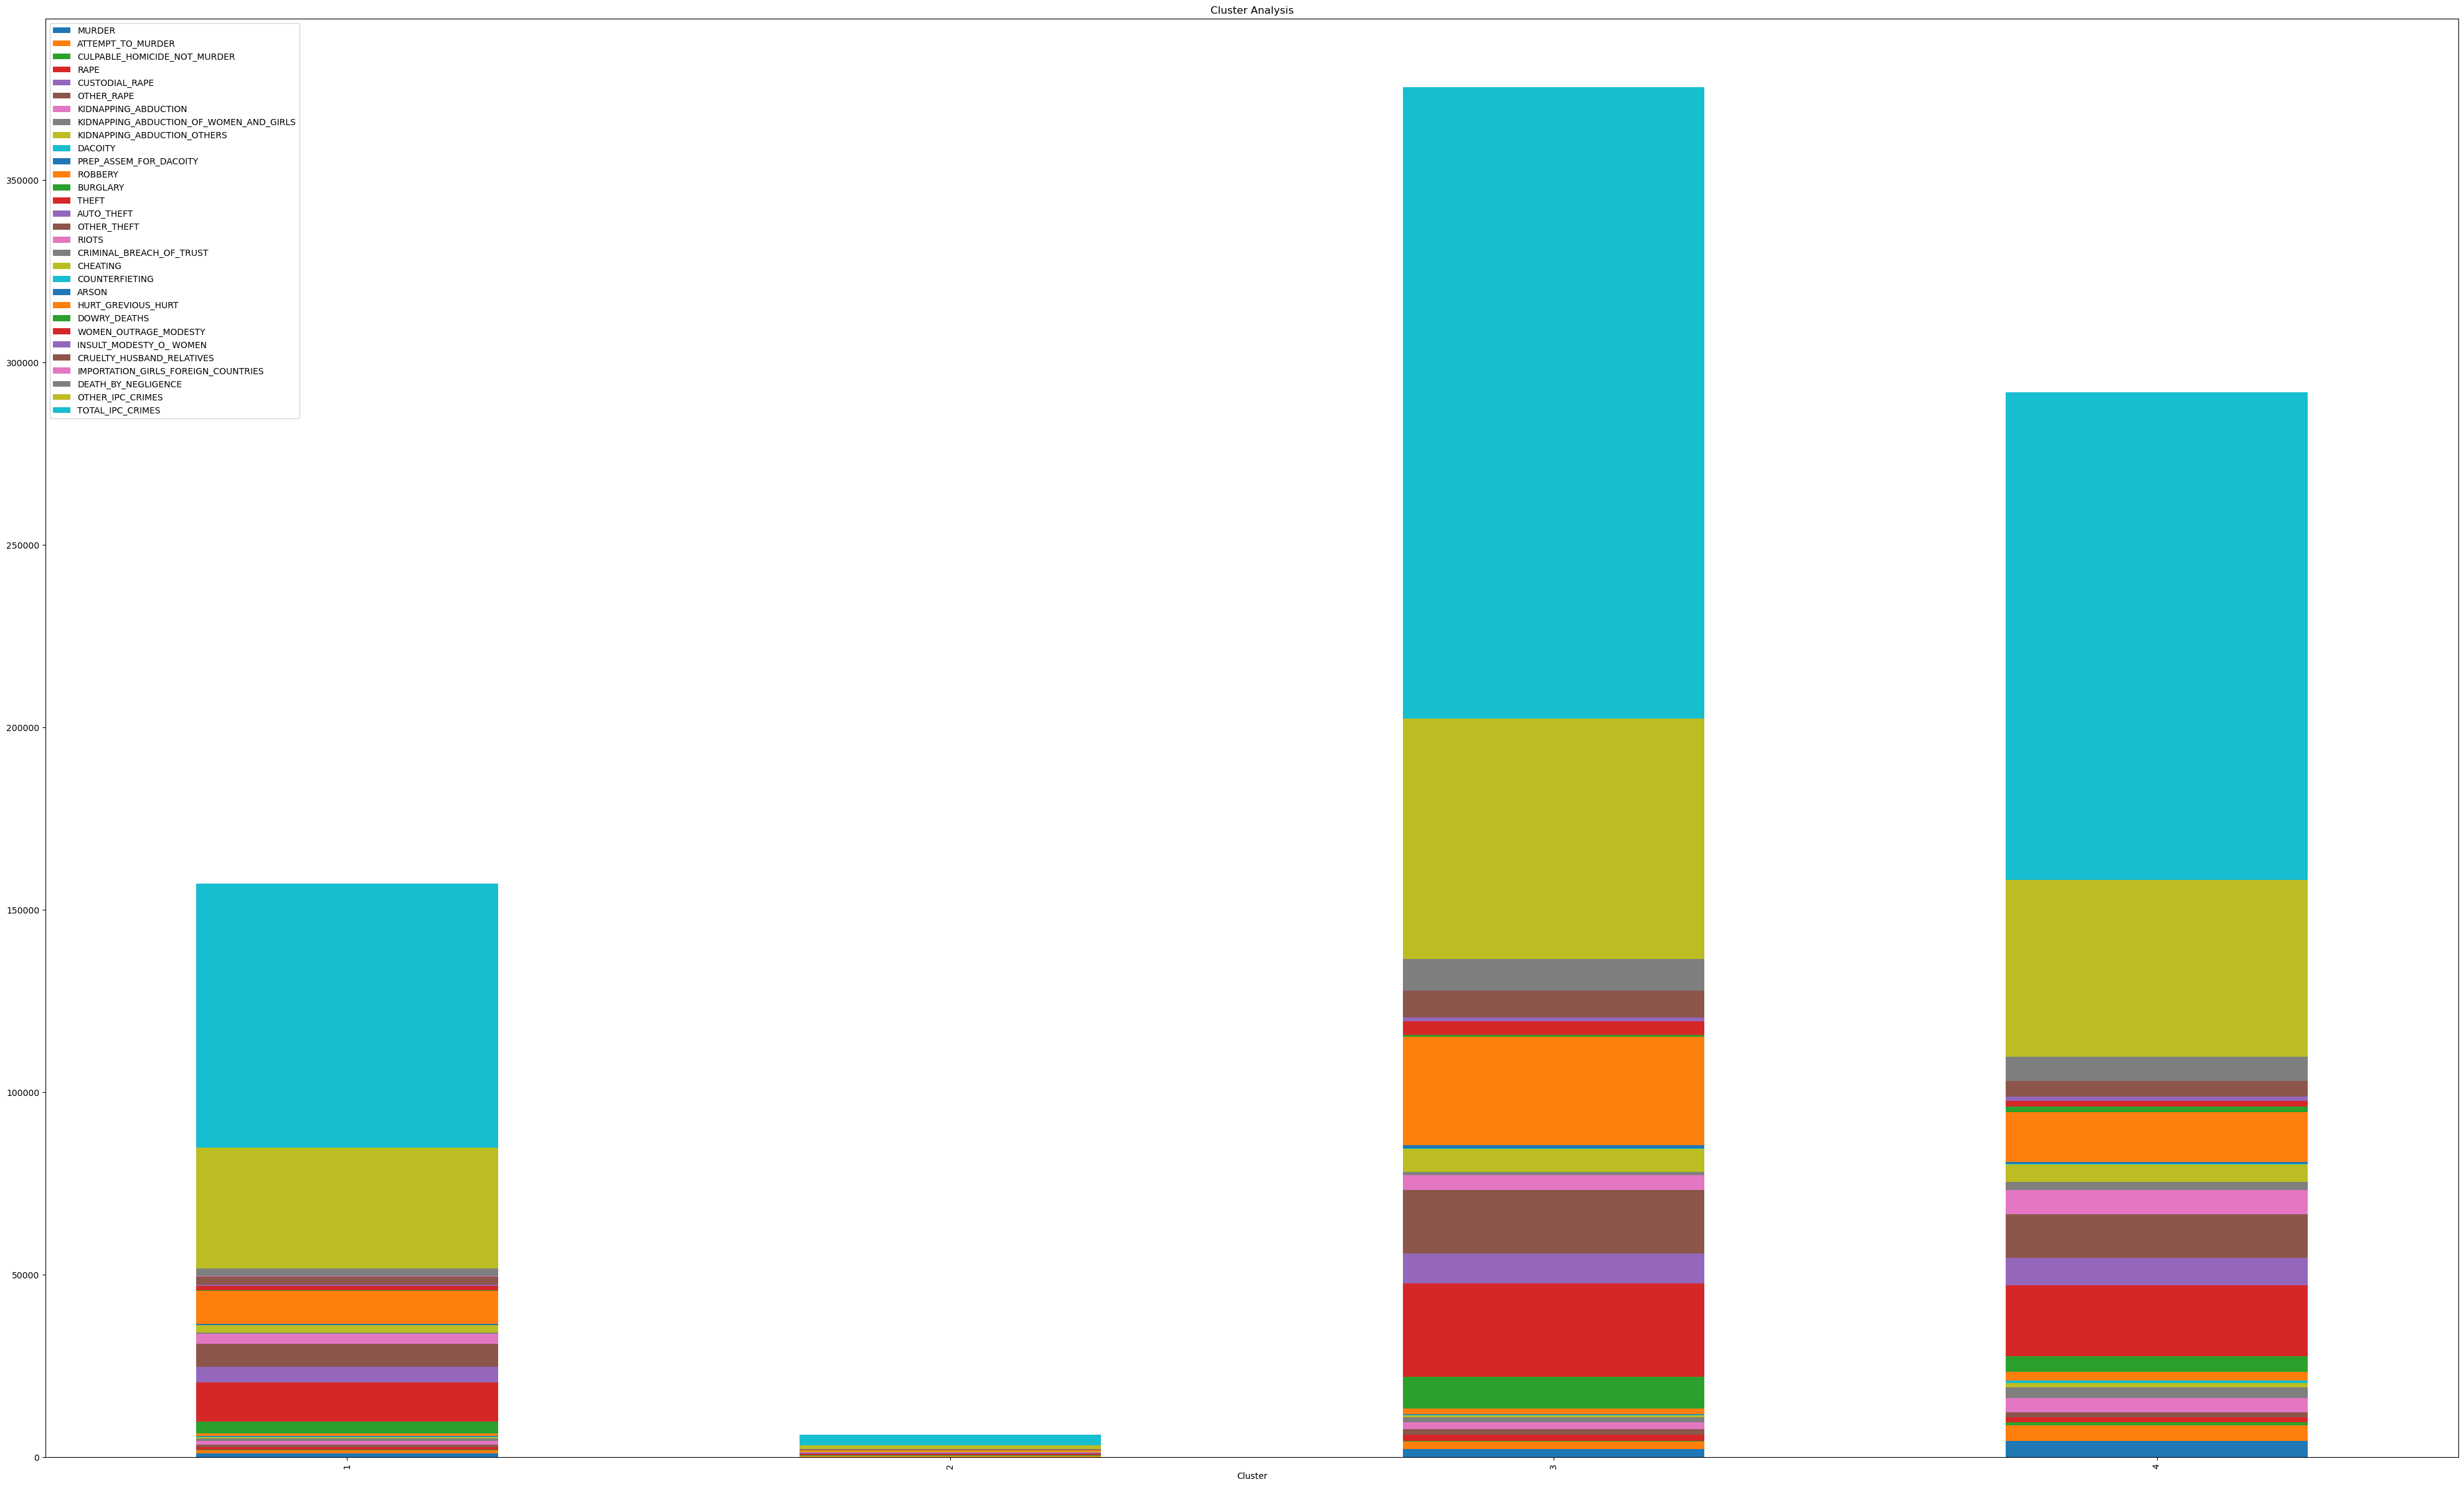

In [134]:
kmeans_mean_cluster.plot(kind='bar',stacked=True)
plt.rcParams['figure.figsize'] = [30,10]
plt.title('Cluster Analysis')
plt.xlabel('Cluster')

In [ ]:
"""
Sensitive Area's = Cluster 3
Moderate Area's  = Cluster 1
Peaceful Area's" = Cluster 2
"""

In [136]:
print(df)

      MURDER  ATTEMPT_TO_MURDER  CULPABLE_HOMICIDE_NOT_MURDER  RAPE  \
0        101               60.0                          17.0  50.0   
1        151              125.0                           1.0  23.0   
2        101               57.0                           2.0  27.0   
3         80               53.0                           1.0  20.0   
4         82               67.0                           1.0  23.0   
...      ...                ...                           ...   ...   
9012       0                0.0                           0.0   0.0   
9013       0                0.0                           0.0   0.0   
9014       5                6.0                           2.0   6.0   
9015      24               21.0                          10.0   7.0   
9016      29               27.0                          12.0  13.0   

      CUSTODIAL_RAPE  OTHER_RAPE  KIDNAPPING_ABDUCTION  \
0                0.0        50.0                  46.0   
1                0.0        23.